# Dask: Comparison of Computational Task Size to Efficiency for Parallelization using Dask

## Task: Matrix Multiplication

In [1]:
import numpy as np
import dask
import time

In [2]:
dims = [2, 10, 50, 100, 200, 500, 1000, 2000, 5000]
n = 100

In [3]:
def generate_square_matrix(dim):
    return np.random.rand(dim,dim)

def time_compute(a,b,n):
    times = []
    for i in range(n):
        start = time.time()
        c = np.dot(a,b)
        end = time.time()
        times.append(end-start)
    return np.mean(times)

results = []
for dim in dims:
    a = generate_square_matrix(dim)
    b = generate_square_matrix(dim)
    results.append(time_compute(a,b,n))

In [4]:
print(results)

[3.2186508178710938e-06, 4.2748451232910156e-06, 3.1468868255615237e-05, 0.00042818784713745118, 0.0010235309600830078, 0.014607174396514893, 0.062679951190948491, 0.39691775560379028, 3.6530384802818299]


# Dask

In [5]:
from dask.distributed import Client
c = Client()
print(c)

<Client: scheduler='tcp://127.0.0.1:33085' processes=8 cores=8>


In [16]:
#-Dask-#
def generate_square_matrix(dim):
    return np.random.rand(dim,dim)

def time_compute(a,b):
    start = time.time()
    c = np.dot(a,b)
    end = time.time()
    return end-start

results = []
for dim in dims:
    a = dask.delayed(generate_square_matrix)(dim)
    b = dask.delayed(generate_square_matrix)(dim)
    times = []
    for i in range(n):
        times.append(dask.delayed(time_compute)(a,b))
    time_result = dask.delayed(np.mean)(times)
    results.append(time_result)

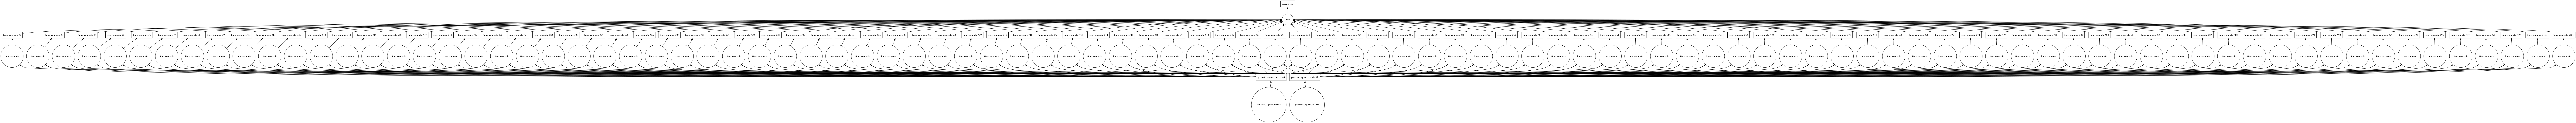

In [17]:
results[0].visualize()

In [18]:
results = dask.compute(*results)

In [19]:
results

(9.6249580383300775e-06,
 1.2936592102050781e-05,
 5.0761699676513671e-05,
 0.0033903956413269044,
 0.0076643967628479007,
 0.026146433353424071,
 0.21105696201324464,
 1.4460280513763428,
 21.154589042663574)